In [64]:
import numpy as np

In [65]:
import matplotlib.pyplot as plt

In [66]:
import pandas as pd
import seaborn as sns

In [67]:
loan = pd.read_csv("/home/santo/Documents/upgrad_PG/loan.csv", dtype={"next_pymnt_d" : str})
loan.shape


(39717, 111)

# Data cleaning and formatting 

### Inspect null value in various columns

In [68]:
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

### Drop columns having nearly all null value

In [69]:
#drop columns having all null value
df = loan
df.columns
for col in df.columns :
    if df[col].isnull().sum() > 36000 :
        df = df.drop([col], axis=1)

#drop rows having all null value
df1 = df.dropna(how="all")

### Inspect columns with only single value

In [70]:
df.nunique().sort_values().head(15)

tax_liens                     1
delinq_amnt                   1
chargeoff_within_12_mths      1
acc_now_delinq                1
application_type              1
policy_code                   1
collections_12_mths_ex_med    1
initial_list_status           1
pymnt_plan                    1
term                          2
pub_rec_bankruptcies          3
verification_status           3
loan_status                   3
pub_rec                       5
home_ownership                5
dtype: int64

### Drop columns having single value

In [71]:
# Drop columns having single value
df1 = df1.drop(columns=["collections_12_mths_ex_med", "pymnt_plan", "initial_list_status", "application_type", "chargeoff_within_12_mths", "acc_now_delinq", "delinq_amnt", "tax_liens", "policy_code"])


### Format the data i.e remove unwanted suffixes.

In [72]:
# Clean data value by removing suffix character
df1["term"] = df1["term"].apply(lambda x : x.split()[0])
df1["int_rate"] = df1["int_rate"].apply(lambda x : x.removesuffix("%"))
df1["revol_util"] = df1["revol_util"].apply(lambda x : str(x).removesuffix("%"))



# Data analysis

### Get data for "Charged Off" vs "Fully Paid" vs "Current"
comparison of various attribute will be done for this three loan status to derive which attributes have significant impact on
default or paid.

In [73]:
df["emp_title"].value_counts()

emp_title
US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Community College of Philadelphia      1
AMEC                                   1
lee county sheriff                     1
Bacon County Board of Education        1
Evergreen Center                       1
Name: count, Length: 28820, dtype: int64

In [74]:
#  dataframe for all loan which are defaulted.
df_c = df1[df1["loan_status"] == "Charged Off"]

#  dataframe for all loan which are fully paid.
df_p = df1[df1["loan_status"] == "Fully Paid"]

#  dataframe for all loan which are running
df_r = df1[df1["loan_status"] == "Current"]



In [84]:
df_c["emp_title"].value_counts()


emp_title
Bank of America              20
US Army                      18
Walmart                      14
UPS                          12
AT&T                         12
                             ..
U of D Jesuit High School     1
EEOC                          1
Life Ambulance                1
R. Young Enterprise, Inc.     1
Auto motors of miami          1
Name: count, Length: 4636, dtype: int64

####  Compare [emp_length] using hist graph across each of "defaulted", "Paid", "Current"


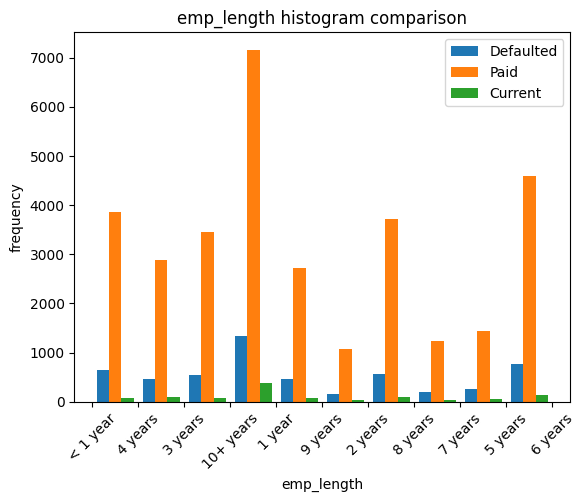

In [12]:
x = df_c["emp_length"].dropna().astype(str)
y = df_p["emp_length"].dropna().astype(str)
z = df_r["emp_length"].dropna().astype(str)

o1, o2, o3 = plt.hist([x, y, z], label=['Defaulted', 'Paid', 'Current'])
plt.legend(loc='upper right')
#plt.yticks(np.arange(0, 100, 1))
plt.xticks(o2, rotation=45)
plt.title('emp_length histogram comparison')
plt.xlabel('emp_length')
plt.ylabel('frequency')
plt.show()

#### Compare [grade] using hist graph across each of "defaulted", "Paid", "Current"


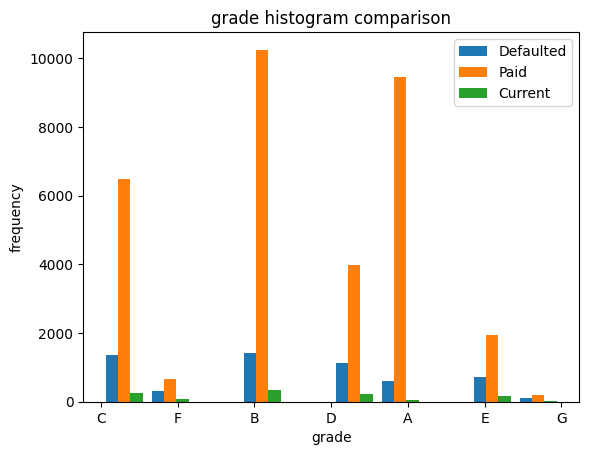

In [13]:

x = df_c["grade"].astype(str)
y = df_p["grade"].astype(str)
z = df_r["grade"].astype(str)

o1,o2,o3 = plt.hist([x, y, z], label=['Defaulted', 'Paid', 'Current'])
plt.legend(loc='upper right')
#plt.xticks(o2, rotation=90)
plt.title('grade histogram comparison')
plt.xlabel('grade')
plt.ylabel('frequency')
plt.show()

#### Compare zip_code using hist graph across each of "defaulted", "Paid", "Current"


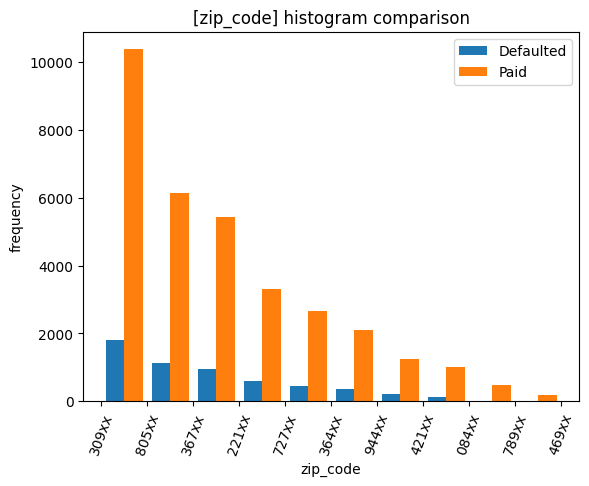

In [14]:

#df_c.loc[:, ["zip_code"]] = df_c["zip_code"].apply(lambda x : x[:-2])
df_c.loc[:, ["zip_code"]] = df_c[df_c["zip_code"].notna()]

#df_p.loc[:, ["zip_code"]] = df_p["zip_code"].apply(lambda x : x[:-2])
df_p.loc[:, ["zip_code"]] = df_p[df_p["zip_code"].notna()]

# dropna value
x = df_c["zip_code"]
x = x.dropna()
y = df_p["zip_code"]
y = y.dropna()


o1,o2,o3 = plt.hist([x, y], label=['Defaulted', 'Paid'])
plt.legend(loc='upper right')
plt.xticks(o2, rotation=70)
plt.title('[zip_code] histogram comparison')
plt.xlabel('zip_code')
plt.ylabel('frequency')
plt.show()

#### Compare [addr_state] using hist graph across each of "defaulted", "Paid", "Current"


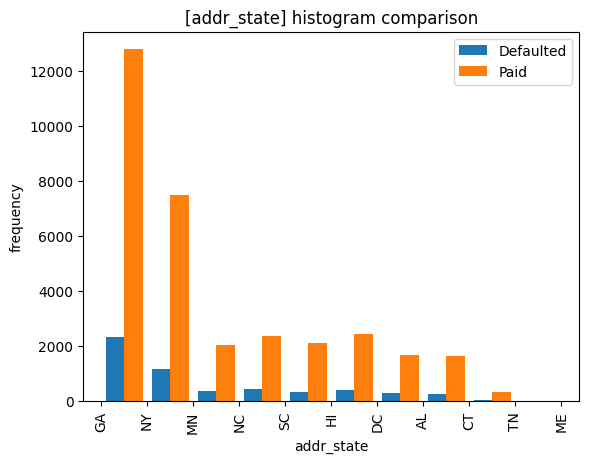

In [15]:
#Compare addr_state using hist graph across each of "defaulted", "Paid", "Current"

x = df_c["addr_state"].astype(str)
y = df_p["addr_state"].astype(str)
o1,o2,o3 = plt.hist([x, y], label=['Defaulted', 'Paid'])
plt.legend(loc='upper right')
plt.xticks(o2, rotation=90)
plt.title('[addr_state] histogram comparison')
plt.xlabel('addr_state')
plt.ylabel('frequency')
plt.show()

#### Compare sub_grade variation using hist graph across each of "defaulted", "Paid", "Current"


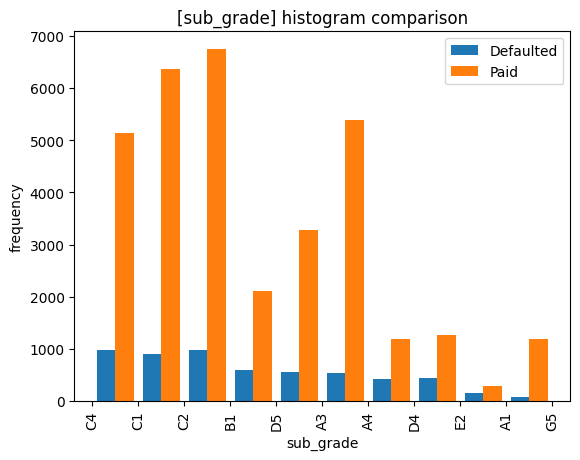

In [16]:
x = df_c["sub_grade"].astype(str)
y = df_p["sub_grade"].astype(str)
o1,o2,o3 = plt.hist([x, y], label=['Defaulted', 'Paid'])
plt.legend(loc='upper right')
plt.xticks(o2, rotation=90)
plt.title('[sub_grade] histogram comparison')
plt.xlabel('sub_grade')
plt.ylabel('frequency')
plt.show()

#### Compare [emp_title] variation using hist graph across each of "defaulted", "Paid", "Current"


In [17]:
len(df_c["emp_title"].unique())

4637

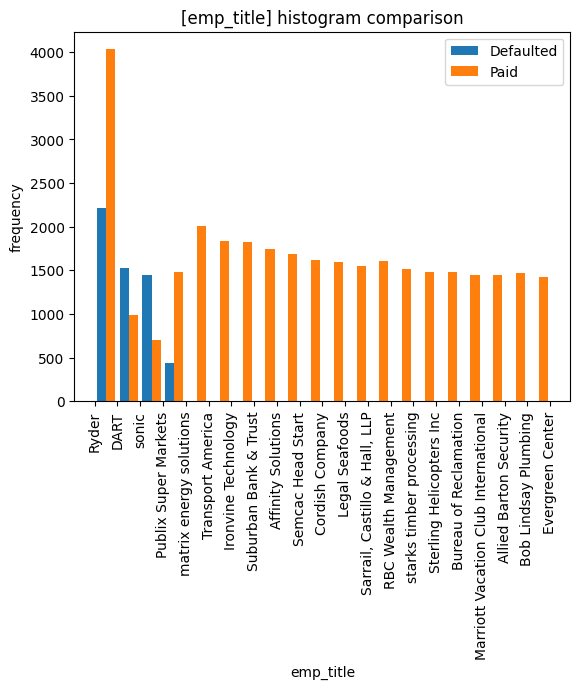

In [18]:

x = df_c["emp_title"].astype(str)
y = df_p["emp_title"].astype(str)
#o1,o2,o3 = plt.hist(x, label=['Defaulted'], bins=20)
o1,o2,o3 = plt.hist([x, y], label=['Defaulted', 'Paid'], bins=20)
plt.legend(loc='upper right')
plt.xticks(o2, rotation=90)
plt.title('[emp_title] histogram comparison')
plt.xlabel('emp_title')
plt.ylabel('frequency')
plt.show()

### Compare [loan_amnt] variation using hist graph across each of "defaulted", "Paid", "Current"**


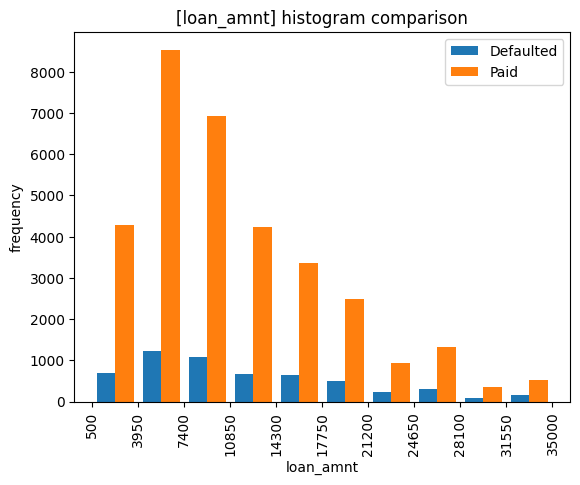

In [19]:

x = df_c["loan_amnt"].astype(int)
y = df_p["loan_amnt"].astype(int)
o1,o2,o3 = plt.hist([x, y], label=['Defaulted', 'Paid'])
plt.legend(loc='upper right')
plt.xticks(o2, rotation=90)
plt.title('[loan_amnt] histogram comparison')
plt.xlabel('loan_amnt')
plt.ylabel('frequency')
plt.show()

#### Compare [purpose] variation using hist graph across each of "defaulted", "Paid", "Current"


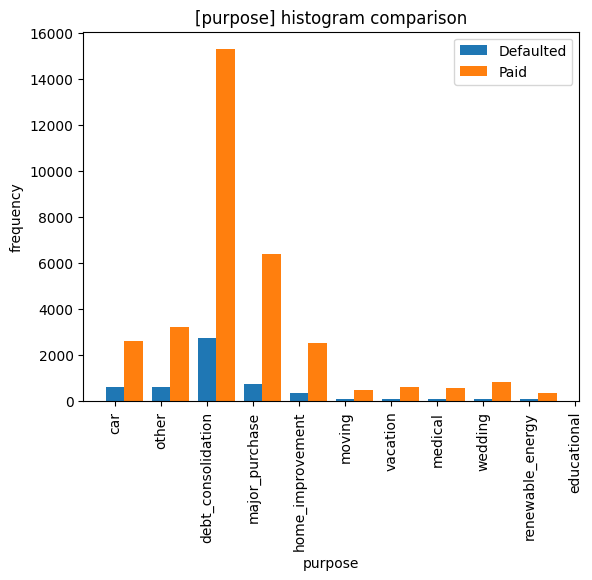

In [20]:

x = df_c["purpose"].astype(str)
y = df_p["purpose"].astype(str)
o1,o2,o3 = plt.hist([x, y], label=['Defaulted', 'Paid'])
plt.legend(loc='upper right')
plt.xticks(o2+0.4, rotation=90)
plt.title('[purpose] histogram comparison')
plt.xlabel('purpose')
plt.ylabel('frequency')
plt.show()

#### Compare [pub_rec_bankruptcies] using hist graph across each of "defaulted", "Paid", "Current"


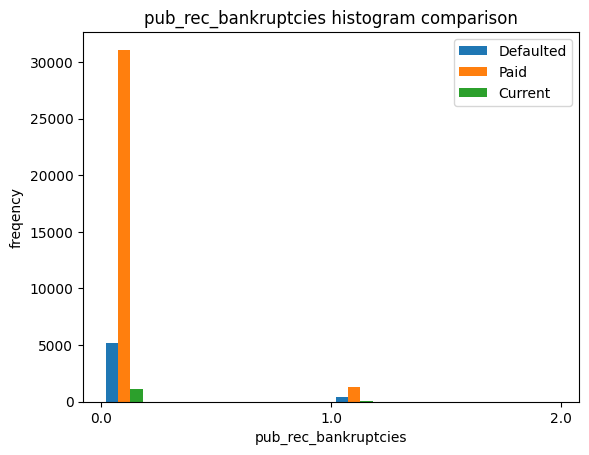

In [21]:
### Compare [pub_rec_bankruptcies] using hist graph across each of "defaulted", "Paid", "Current"

x = df_c["pub_rec_bankruptcies"].dropna().astype(str)
y = df_p["pub_rec_bankruptcies"].dropna().astype(str)
z = df_r["pub_rec_bankruptcies"].dropna().astype(str)

o1, o2, o3 = plt.hist([x, y, z], label=['Defaulted', 'Paid', 'Current'])
plt.legend(loc='upper right')
plt.title('pub_rec_bankruptcies histogram comparison')
plt.xlabel('pub_rec_bankruptcies')
plt.ylabel('freqency')
plt.show()

#### Compare [int_rate] variation using hist graph across each of "defaulted", "Paid", "Current"


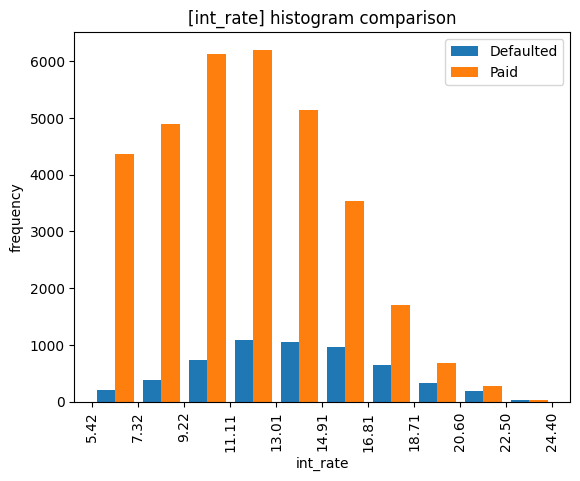

In [22]:

x = df_c["int_rate"].astype(float)
y = df_p["int_rate"].astype(float)
o1, o2, o3 = plt.hist([x, y], label=['Defaulted', 'Paid'])
plt.legend(loc='upper right')
plt.xticks(o2, rotation=90)
plt.title('[int_rate] histogram comparison')
plt.xlabel('int_rate')
plt.ylabel('frequency')
plt.show()

#### Compare home_ownership variation using hist graph across each of "defaulted", "Paid", "Current"


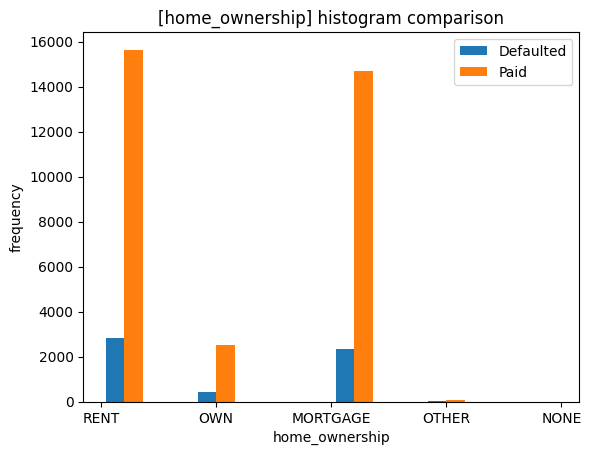

In [23]:
#Compare home_ownership variation using hist graph across each of "defaulted", "Paid", "Current"

x = df_c["home_ownership"].astype(str)
y = df_p["home_ownership"].astype(str)
o1, o2, o3 = plt.hist([x, y], label=['Defaulted', 'Paid'])
plt.legend(loc='upper right')
#plt.xticks(o2, rotation=90)
plt.title('[home_ownership] histogram comparison')
plt.xlabel('home_ownership')
plt.ylabel('frequency')
plt.show()

#### Compare verification_status variation using hist graph across each of "defaulted", "Paid", "Current"


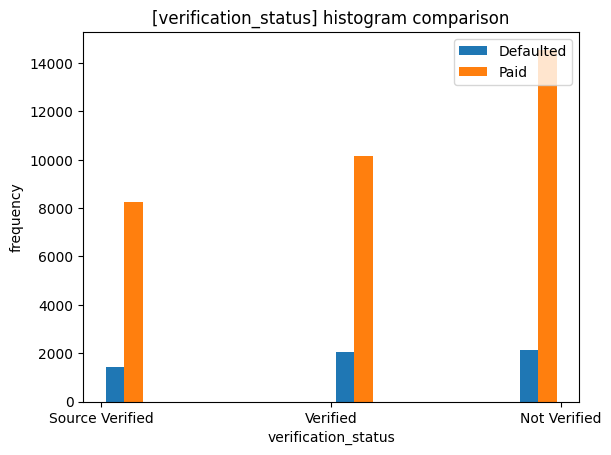

In [24]:

x = df_c["verification_status"].astype(str)
y = df_p["verification_status"].astype(str)
o1, o2, o3 = plt.hist([x, y], label=['Defaulted', 'Paid'])
plt.legend(loc='upper right')
plt.title('[verification_status] histogram comparison')
plt.xlabel('verification_status')
plt.ylabel('frequency')
plt.show()

#### Compare [term] variation using hist graph across each of "defaulted", "Paid", "Current"


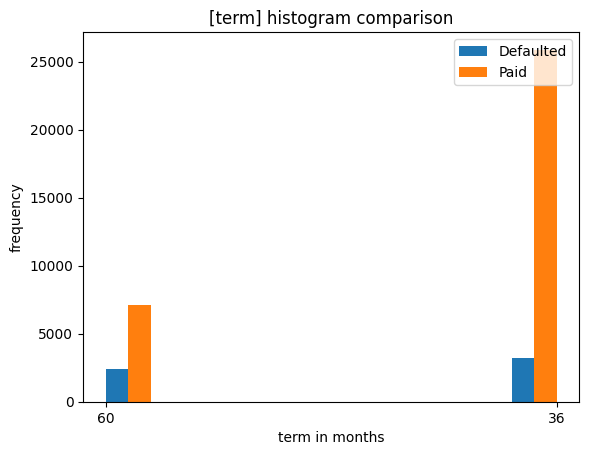

In [25]:
#Compare term variation using hist graph across each of "defaulted", "Paid", "Current"

x = df_c["term"].astype(str)
y = df_p["term"].astype(str)
o1, o2, o3 = plt.hist([x, y], label=['Defaulted', 'Paid'], rwidth=100)
plt.legend(loc='upper right')
plt.title('[term] histogram comparison')
plt.xlabel('term in months')
plt.ylabel('frequency')
plt.show()

#### Compare [installment] variation using hist graph across each of "defaulted", "Paid", "Current"


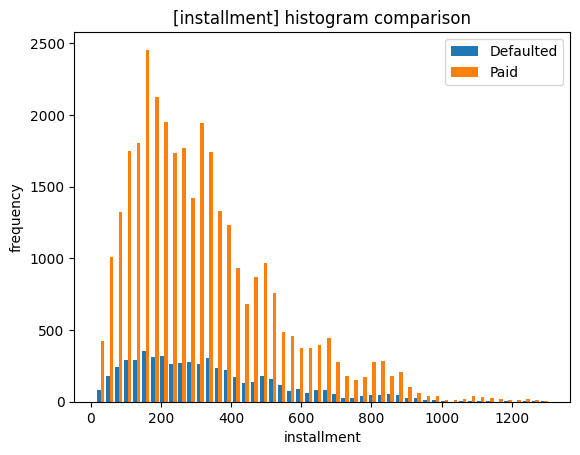

In [26]:
x = df_c["installment"].astype(float)
y = df_p["installment"].astype(float)
o1, o2, o3 = plt.hist([x, y], label=['Defaulted', 'Paid'], bins=50)
plt.legend(loc='upper right')
plt.title('[installment] histogram comparison')
plt.xlabel('installment')
plt.ylabel('frequency')
plt.show()

#### Compare [annual_inc] variation using hist graph across each of "defaulted", "Paid", "Current"


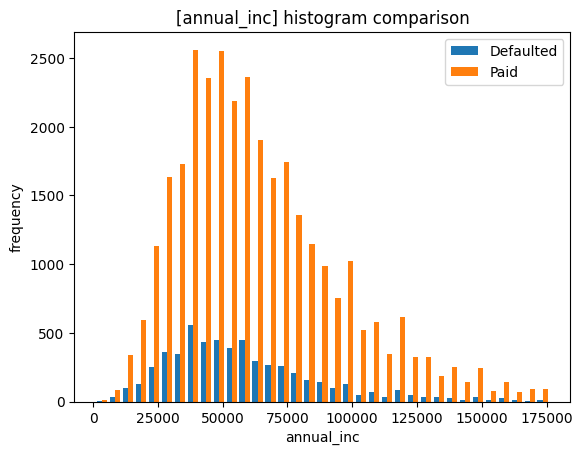

In [27]:

x = df_c["annual_inc"].astype(int)
y = df_p["annual_inc"].astype(int)
o1, o2, o3 = plt.hist([x, y], label=['Defaulted', 'Paid'],bins=np.arange(1000, 180000, 5000))
plt.legend(loc='upper right')
plt.title('[annual_inc] histogram comparison')
plt.xlabel('annual_inc')
plt.ylabel('frequency')
plt.show()

#### Compare [delinq_2yrs] variation using hist graph across each of "defaulted", "Paid", "Current"


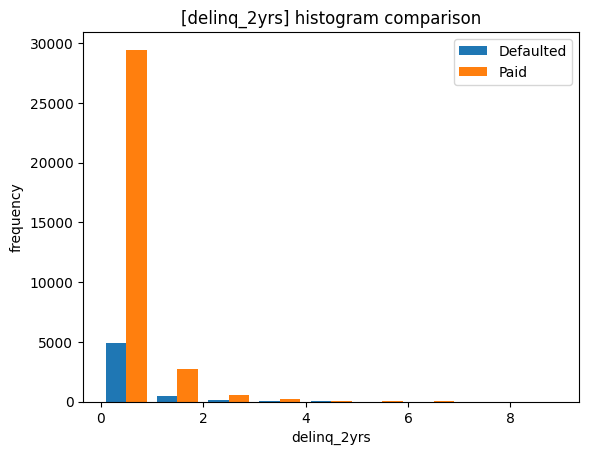

In [28]:

x = df_c["delinq_2yrs"].astype(int)
y = df_p["delinq_2yrs"].astype(int)
o1, o2, o3 = plt.hist([x, y], label=['Defaulted', 'Paid'], bins=np.arange(0,10))
plt.legend(loc='upper right')
plt.title('[delinq_2yrs] histogram comparison')
plt.xlabel('delinq_2yrs')
plt.ylabel('frequency')
plt.show()

#### Compare [last_credit_pull_d] variation using hist graph across each of "defaulted", "Paid", "Current"


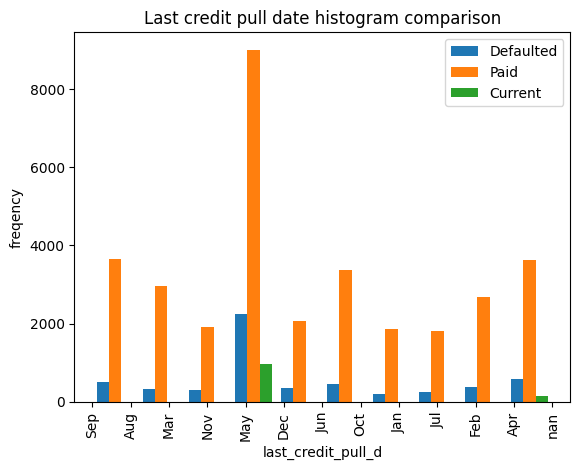

In [29]:
x = df_c["last_credit_pull_d"].apply(lambda x : str(x)[0:3])
y = df_p["last_credit_pull_d"].apply(lambda x : str(x)[0:3])
z = df_r["last_credit_pull_d"].apply(lambda x : str(x)[0:3])
x = x.dropna()
y = y.dropna()
z = z.dropna()

o1, o2, o3 = plt.hist([x, y, z], label=['Defaulted', 'Paid', "Current"])
plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.title('Last credit pull date histogram comparison')
plt.xlabel('last_credit_pull_d')
plt.ylabel('freqency')

plt.show()

#### Compare [open_acc] variation using hist graph across each of "defaulted", "Paid", "Current"


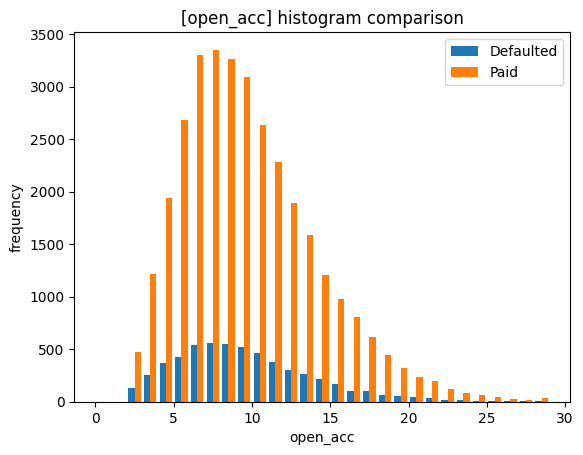

In [30]:
#Compare [open_acc] variation using hist graph across each of "defaulted", "Paid", "Current"

x = df_c["open_acc"].astype(int)
y = df_p["open_acc"].astype(int)
o1, o2, o3 = plt.hist([x, y], label=['Defaulted', 'Paid'], bins=np.arange(0,30))
plt.legend(loc='upper right')
plt.title('[open_acc] histogram comparison')
plt.xlabel('open_acc')
plt.ylabel('frequency')
plt.show()

#### Compare [revol_util] variation using hist graph across each of "defaulted", "Paid", "Current"


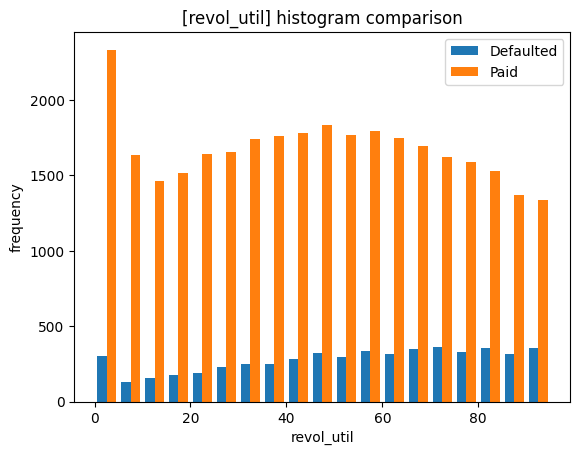

In [31]:
#Compare [revol_util] variation using hist graph across each of "defaulted", "Paid", "Current"

x = df_c["revol_util"].astype(float)
y = df_p["revol_util"].astype(float)
o1, o2, o3 = plt.hist([x, y], label=['Defaulted', 'Paid'], bins=np.arange(0,100,5))
plt.legend(loc='upper right')
plt.title('[revol_util] histogram comparison')
plt.xlabel('revol_util')
plt.ylabel('frequency')
plt.show()

#### Compare [total_acc] variation using hist graph across each of "defaulted", "Paid", "Current"


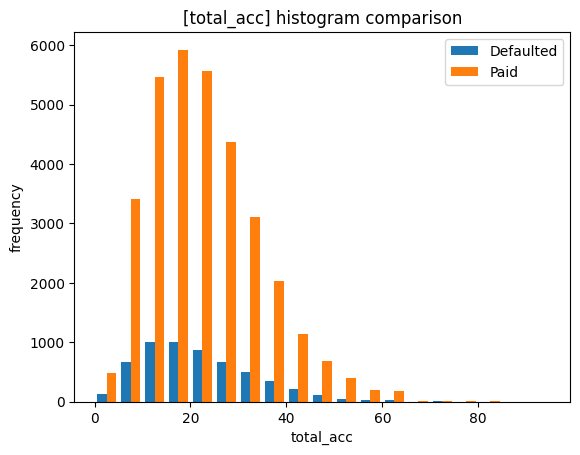

In [32]:
#Compare [total_acc] variation using hist graph across each of "defaulted", "Paid", "Current"

x = df_c["total_acc"].astype(float)
y = df_p["total_acc"].astype(float)
o1, o2, o3 = plt.hist([x, y], label=['Defaulted', 'Paid'], bins=np.arange(0,100,5))
plt.legend(loc='upper right')
plt.title('[total_acc] histogram comparison')
plt.xlabel('total_acc')
plt.ylabel('frequency')
plt.show()

#### Compare [dti] variation using hist graph across each of "defaulted", "Paid", "Current"


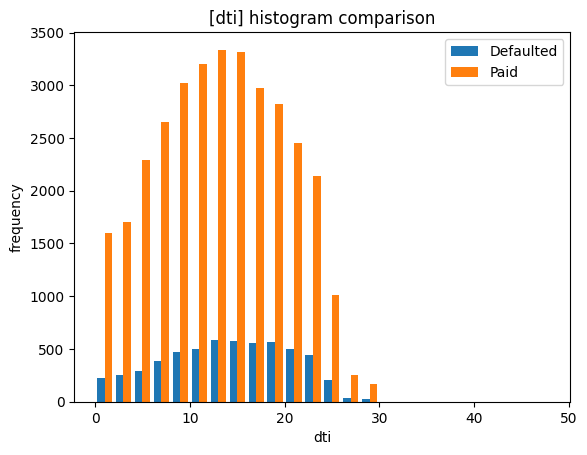

In [33]:
#Compare [dti] variation using hist graph across each of "defaulted", "Paid", "Current"

x = df_c["dti"].astype(float)
y = df_p["dti"].astype(float)
o1, o2, o3 = plt.hist([x, y], label=['Defaulted', 'Paid'], bins=np.arange(0,50,2))
plt.legend(loc='upper right')
plt.title('[dti] histogram comparison')
plt.xlabel('dti')
plt.ylabel('frequency')
plt.show()

#### Compare [inq_last_6mths] variation using hist graph across each of "defaulted", "Paid", "Current"


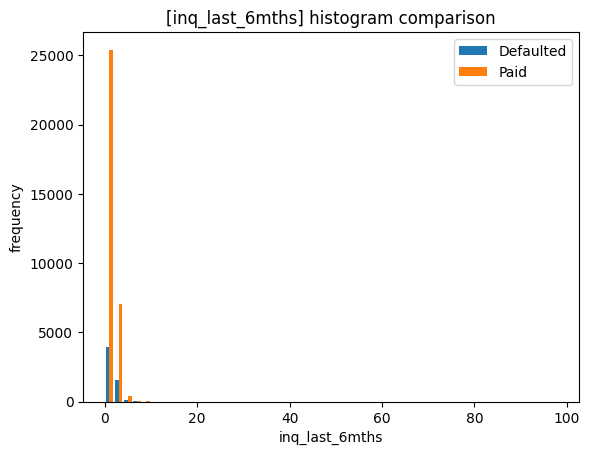

In [34]:
#Compare [inq_last_6mths] variation using hist graph across each of "defaulted", "Paid", "Current"

x = df_c["inq_last_6mths"]
y = df_p["inq_last_6mths"]
o1, o2, o3 = plt.hist([x, y], label=['Defaulted', 'Paid'], bins=np.arange(0,100,2))
plt.legend(loc='upper right')
plt.title('[inq_last_6mths] histogram comparison')
plt.xlabel('inq_last_6mths')
plt.ylabel('frequency')
plt.show()

#### Compare [installment] variation using hist graph across each of "defaulted", "Paid", "Current"


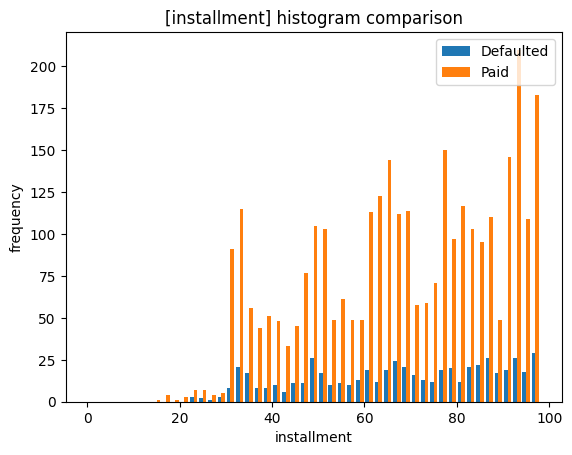

In [35]:
#Compare [installment] variation using hist graph across each of "defaulted", "Paid", "Current"

x = df_c["installment"]
y = df_p["installment"]
o1, o2, o3 = plt.hist([x, y], label=['Defaulted', 'Paid'], bins=np.arange(0,100,2))
plt.legend(loc='upper right')
plt.title('[installment] histogram comparison')
plt.xlabel('installment')
plt.ylabel('frequency')
plt.show()

#### Compare [pub_rec] variation using hist graph across each of "defaulted", "Paid", "Current"


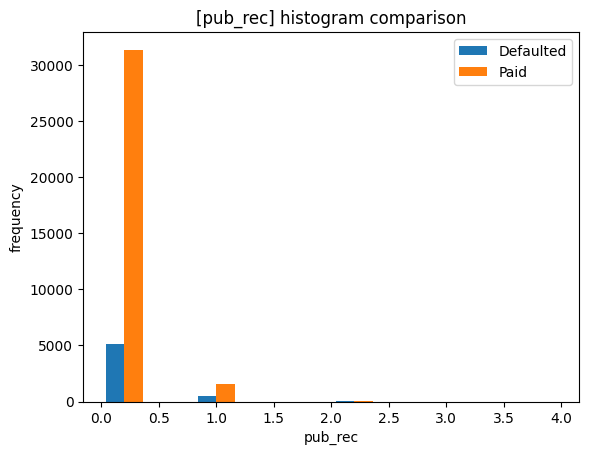

In [36]:
#Compare [pub_rec] variation using hist graph across each of "defaulted", "Paid", "Current"

x = df_c["pub_rec"]
y = df_p["pub_rec"]
o1, o2, o3 = plt.hist([x, y], label=['Defaulted', 'Paid'])
plt.legend(loc='upper right')
plt.title('[pub_rec] histogram comparison')
plt.xlabel('pub_rec')
plt.ylabel('frequency')
plt.show()


#### Compare [pub_rec] variation using hist graph across each of "defaulted", "Paid", "Current"


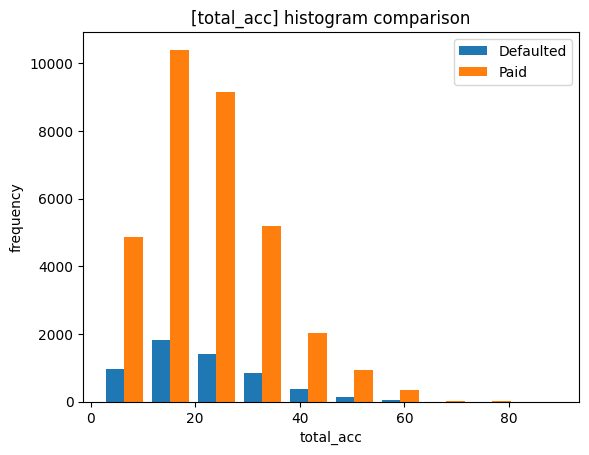

In [37]:
#Compare [total_acc] variation using hist graph across each of "defaulted", "Paid", "Current"

x = df_c["total_acc"].astype(int)
y = df_p["total_acc"].astype(int)
o1, o2, o3 = plt.hist([x, y], label=['Defaulted', 'Paid'])
plt.legend(loc='upper right')
plt.title('[total_acc] histogram comparison')
plt.xlabel('total_acc')
plt.ylabel('frequency')
plt.show()


#### Compare [total_rec_prncp] variation using hist graph across each of "defaulted", "Paid", "Current"


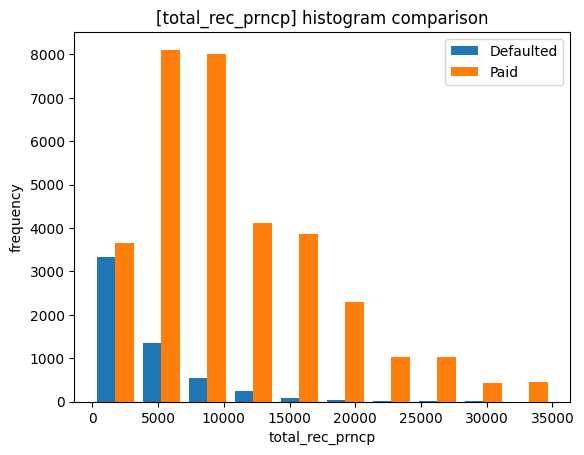

In [38]:
#Compare [total_rec_prncp] variation using hist graph across each of "defaulted", "Paid", "Current"

x = df_c["total_rec_prncp"].astype(int)
y = df_p["total_rec_prncp"].astype(int)
o1, o2, o3 = plt.hist([x, y], label=['Defaulted', 'Paid'])
plt.legend(loc='upper right')
plt.title('[total_rec_prncp] histogram comparison')
plt.xlabel('total_rec_prncp')
plt.ylabel('frequency')
plt.show()



#### Compare [revol_bal] variation using hist graph across each of "defaulted", "Paid", "Current"


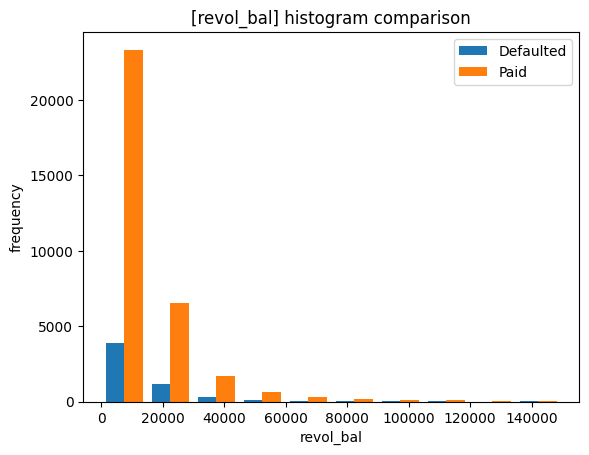

In [39]:
#Compare [revol_bal] variation using hist graph across each of "defaulted", "Paid"

x = df_c["revol_bal"].astype(int)
y = df_p["revol_bal"].astype(int)
o1, o2, o3 = plt.hist([x, y], label=['Defaulted', 'Paid'])
plt.legend(loc='upper right')
plt.title('[revol_bal] histogram comparison')
plt.xlabel('revol_bal')
plt.ylabel('frequency')
plt.show()


#### Compare [revol_util] variation using hist graph across each of "defaulted", "Paid", "Current"


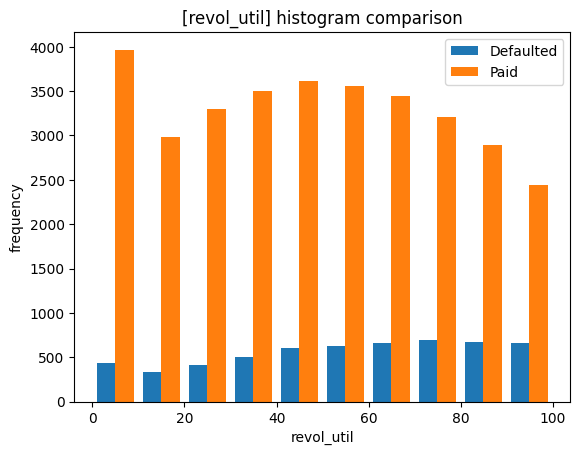

In [40]:
#Compare [revol_util] variation using hist graph across each of "defaulted", "Paid"

x = df_c["revol_util"].astype(float)
y = df_p["revol_util"].astype(float)
o1, o2, o3 = plt.hist([x, y], label=['Defaulted', 'Paid'])
plt.legend(loc='upper right')
plt.title('[revol_util] histogram comparison')
plt.xlabel('revol_util')
plt.ylabel('frequency')
plt.show()

#### Compare [total_rec_int] variation using hist graph across each of "defaulted", "Paid", "Current"


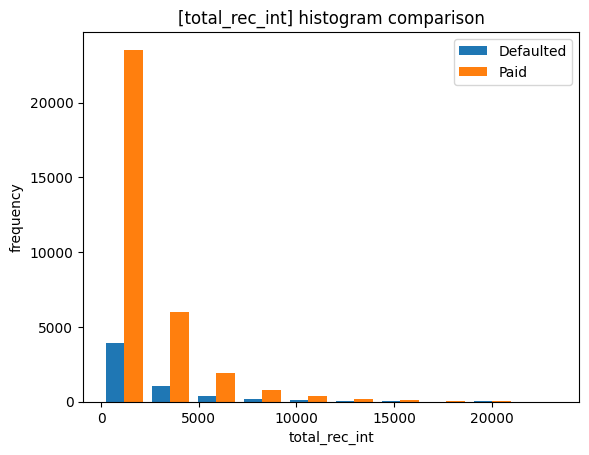

In [41]:
#Compare [total_rec_int] variation using hist graph across each of "defaulted", "Paid"

x = df_c["total_rec_int"].astype(int)
y = df_p["total_rec_int"].astype(int)
o1, o2, o3 = plt.hist([x, y], label=['Defaulted', 'Paid'])
plt.legend(loc='upper right')
plt.title('[total_rec_int] histogram comparison')
plt.xlabel('total_rec_int')
plt.ylabel('frequency')
plt.show()


#### Compare [total_rec_late_fee] variation using hist graph across each of "defaulted", "Paid", "Current"


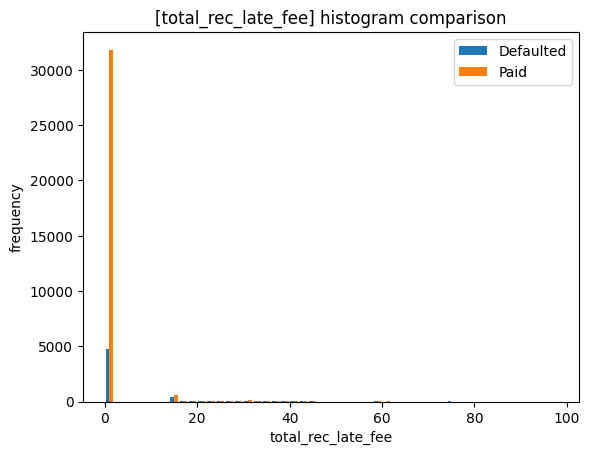

In [42]:
#Compare [total_rec_late_fee] variation using hist graph across each of "defaulted", "Paid"

x = df_c["total_rec_late_fee"].astype(float)
y = df_p["total_rec_late_fee"].astype(float)
o1, o2, o3 = plt.hist([x, y], label=['Defaulted', 'Paid'], bins=np.arange(0,100,2))
plt.legend(loc='upper right')
plt.title('[total_rec_late_fee] histogram comparison')
plt.xlabel('total_rec_late_fee')
plt.ylabel('frequency')
plt.show()



#### Compare [recoveries] variation using hist graph across each of "defaulted", "Paid", "Current"


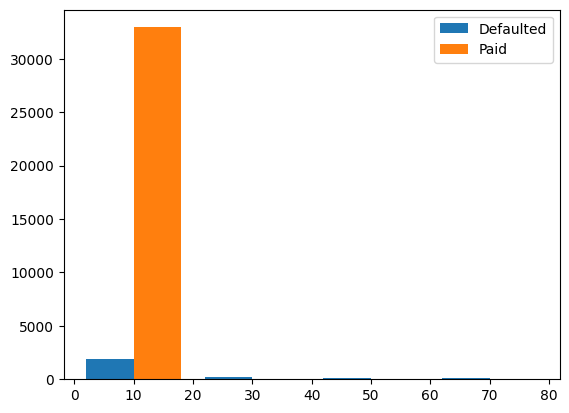

In [43]:
#Compare [recoveries] variation using hist graph across each of "defaulted", "Paid"

x = df_c["recoveries"].astype(int)
y = df_p["recoveries"].astype(int)
o1, o2, o3 = plt.hist([x, y], label=['Defaulted', 'Paid'], bins=np.arange(0,100,20))
plt.legend(loc='upper right')
plt.show()


#### Compare [collection_recovery_fee] variation using hist graph across each of "defaulted", "Paid", "Current"


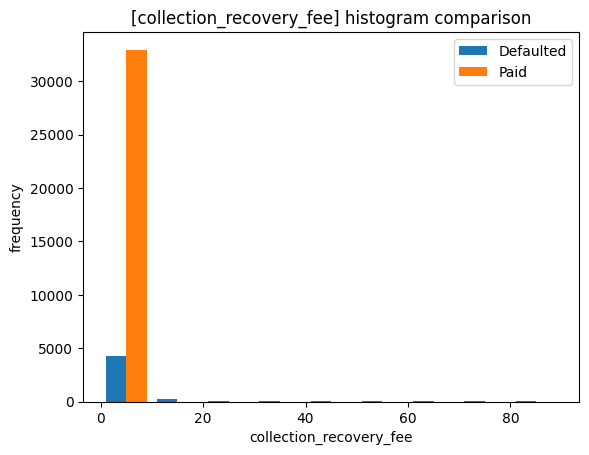

In [44]:
#Compare [collection_recovery_fee] variation using hist graph across each of "defaulted", "Paid"

x = df_c["collection_recovery_fee"].astype(int)
y = df_p["collection_recovery_fee"].astype(int)
o1, o2, o3 = plt.hist([x, y], label=['Defaulted', 'Paid'], bins=np.arange(0,100,10))
#plt.xticks(range(len(x.columns)),rotation=100)

plt.legend(loc='upper right')
plt.title('[collection_recovery_fee] histogram comparison')
plt.xlabel('collection_recovery_fee')
plt.ylabel('frequency')
plt.show()



#### Compare [total_pymnt] variation using hist graph across each of "defaulted", "Paid", "Current"


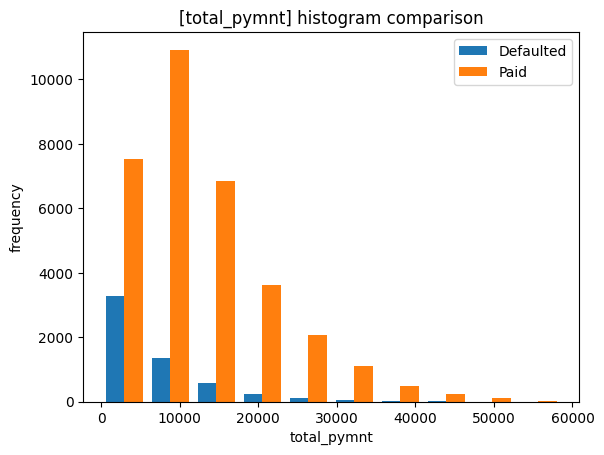

In [45]:
#Compare [total_pymnt] variation using hist graph across each of "defaulted", "Paid"

x = df_c["total_pymnt"].astype(int)
y = df_p["total_pymnt"].astype(int)
o1, o2, o3 = plt.hist([x, y], label=['Defaulted', 'Paid'])
plt.legend(loc='upper right')
plt.title('[total_pymnt] histogram comparison')
plt.xlabel('total_pymnt')
plt.ylabel('frequency')
plt.show()


## Compare attribute variation using box plots


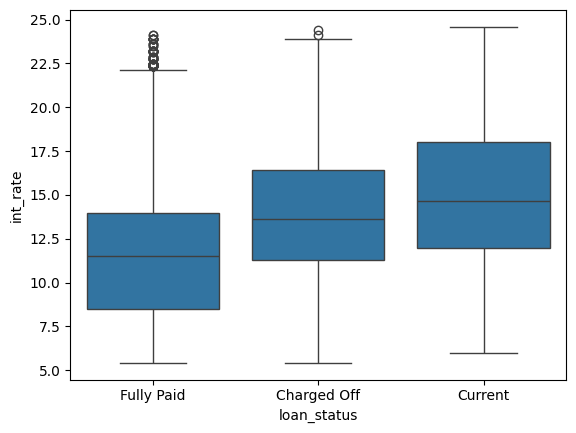

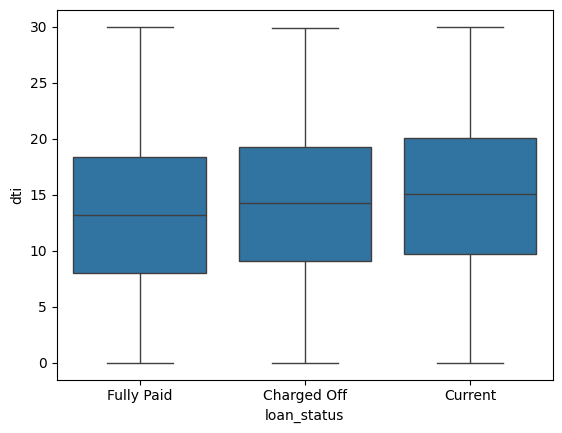

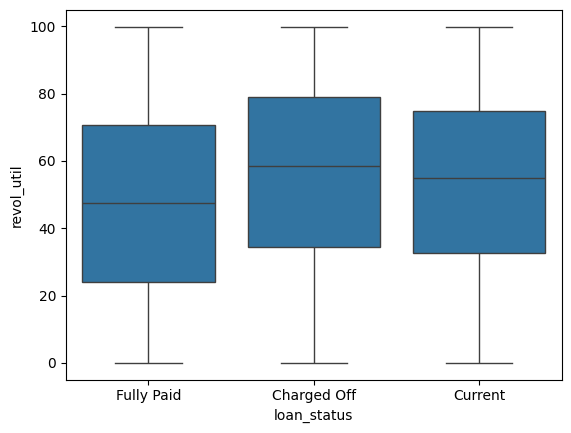

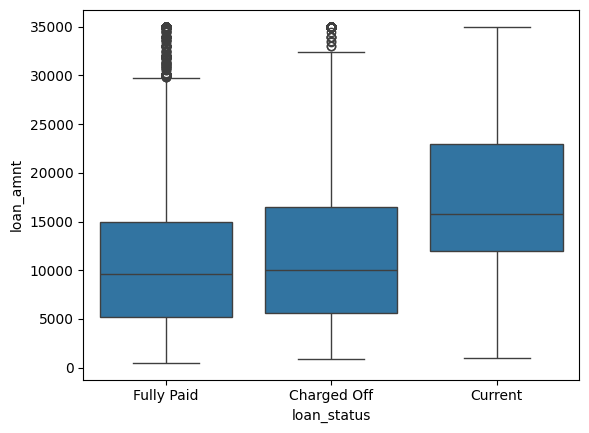

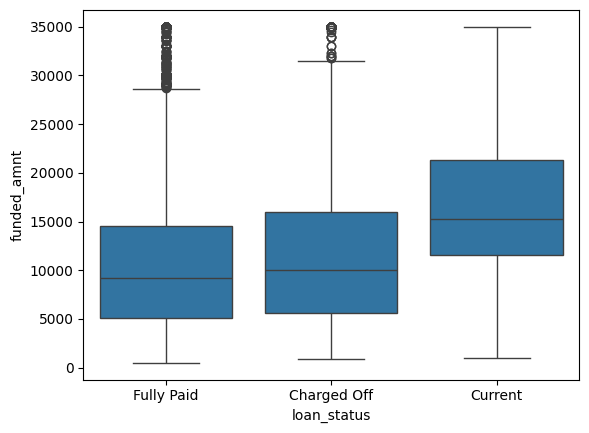

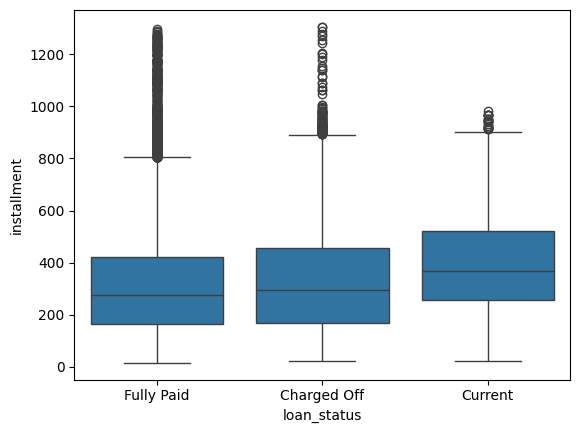

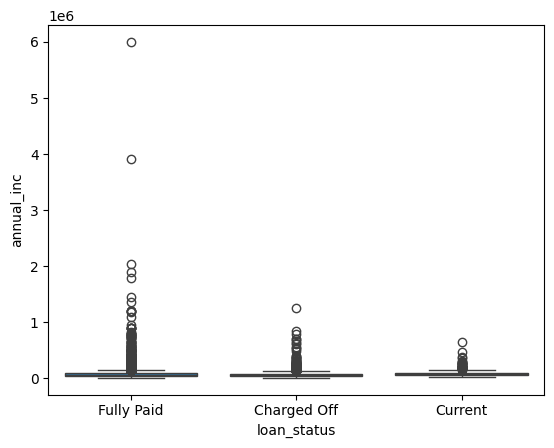

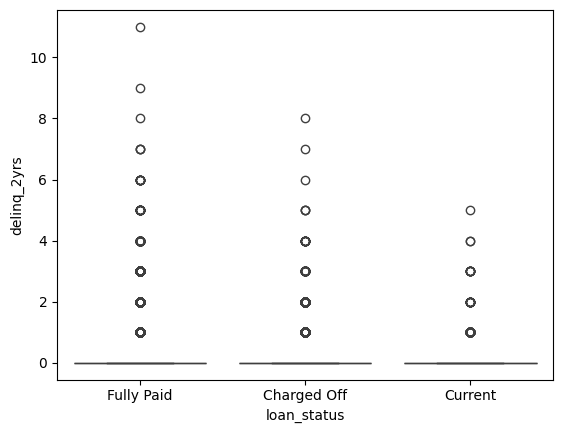

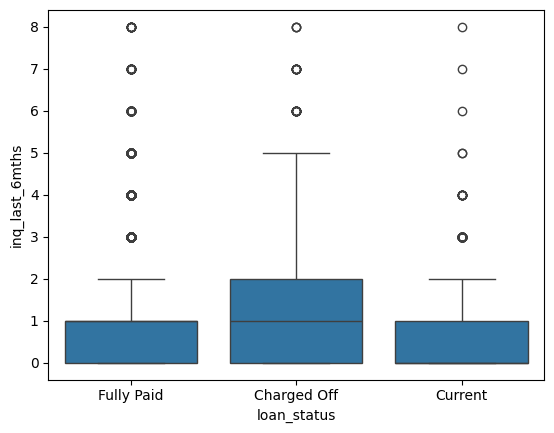

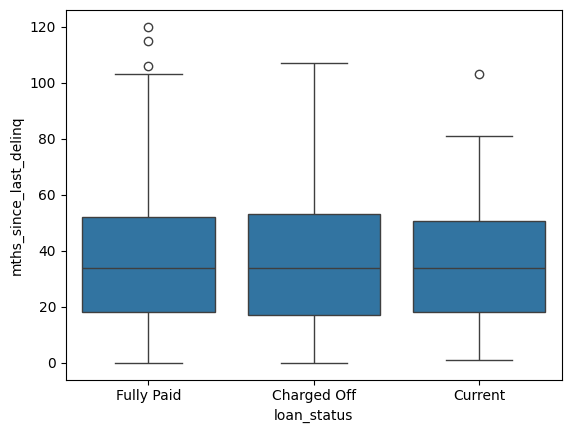

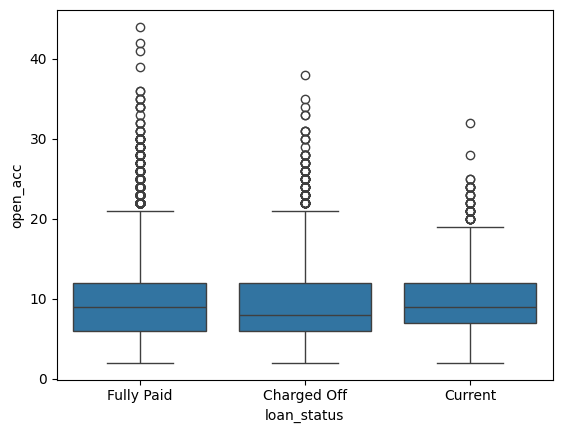

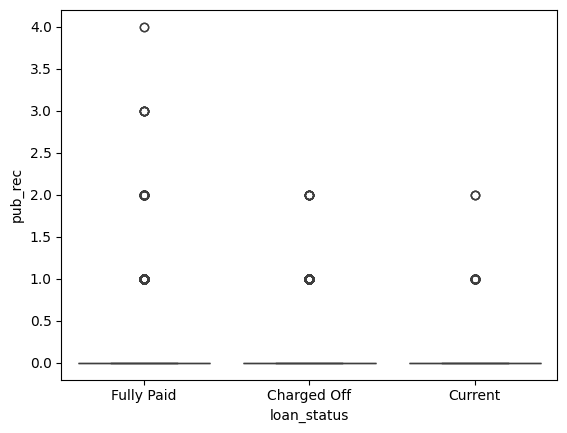

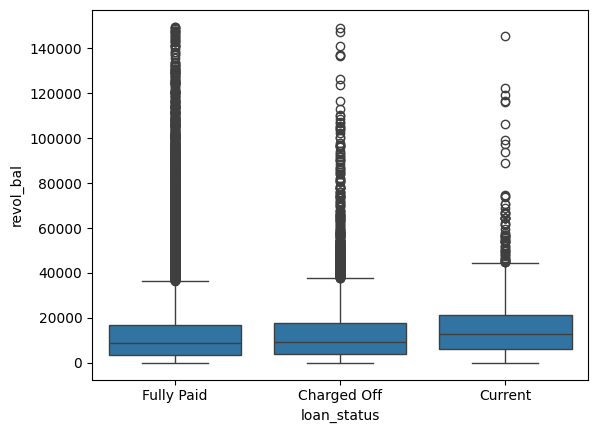

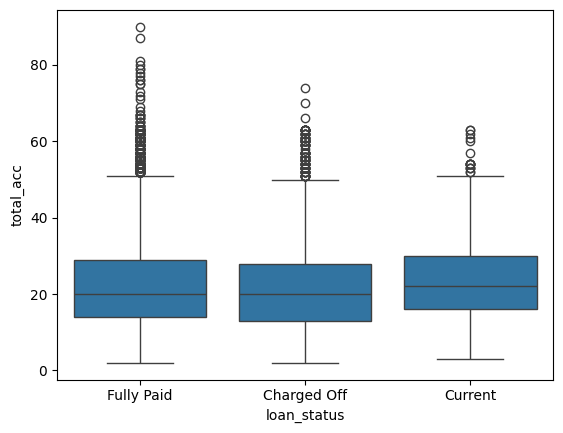

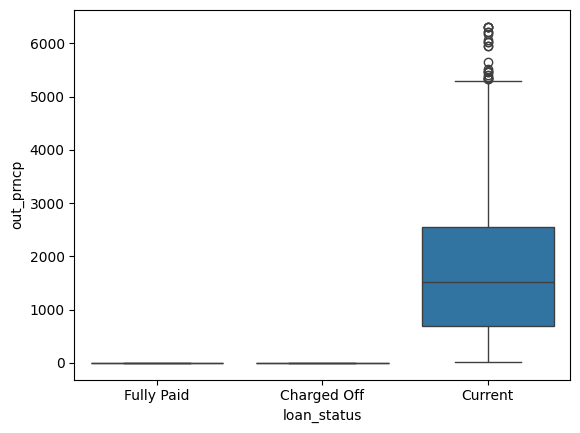

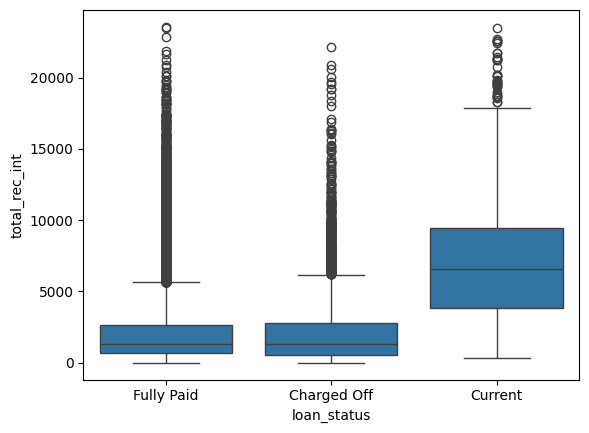

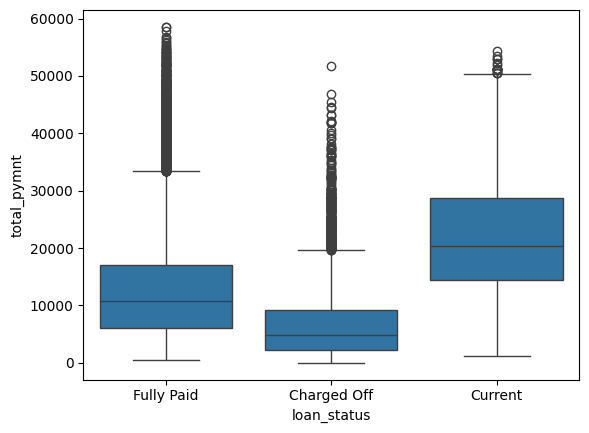

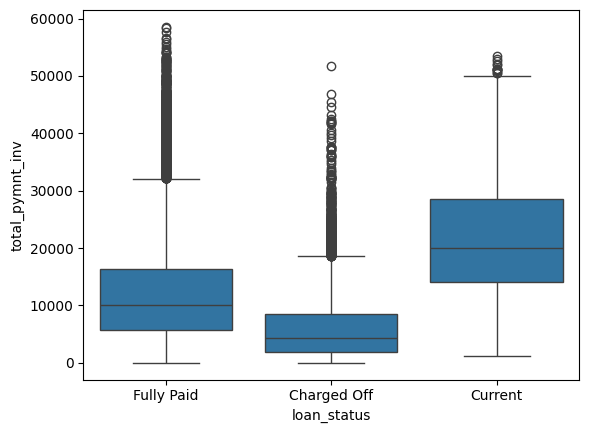

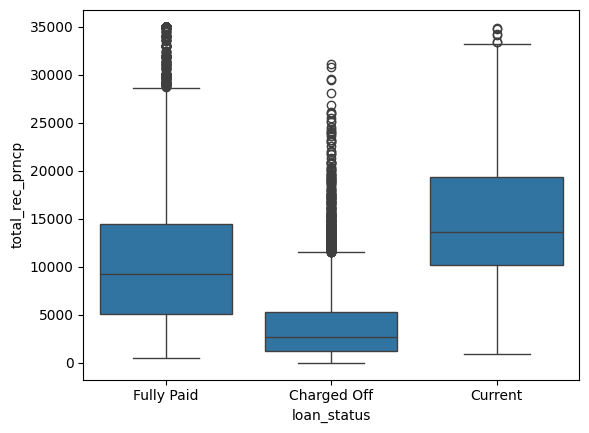

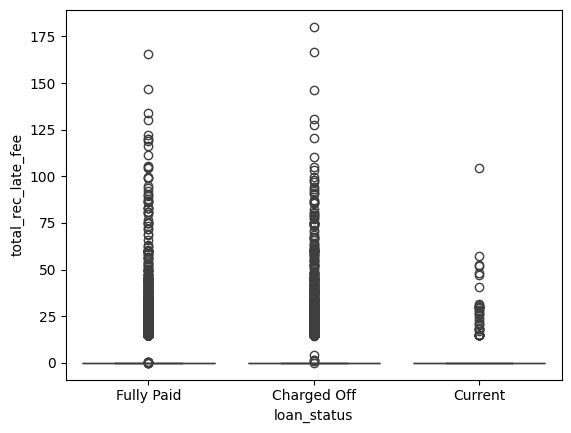

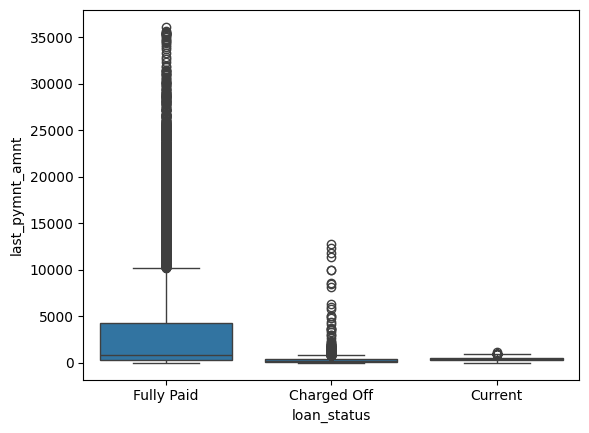

In [46]:
int_columns = ["loan_amnt", "funded_amnt", "installment", "annual_inc", "delinq_2yrs", "inq_last_6mths", "mths_since_last_delinq",
               "open_acc", "pub_rec", "revol_bal",  "total_acc", "out_prncp", "total_rec_int", "total_pymnt", "total_pymnt_inv",
               "total_rec_prncp", "total_rec_late_fee", "last_pymnt_amnt"]
str_columns = ["term", "grade", 'sub_grade', 'emp_title','emp_length', 'home_ownership', 'emp_length', 'home_ownership','title', 'zip_code', 'addr_state',
                'initial_list_status']
float_columns = ["int_rate", "dti", "revol_util"]
date_columns = ["issue_d", "last_pymnt_d", "last_credit_pull_d"]

# Boxplot comparision of alfloatl attribute for [Default] vs [Paid] vs [Current]
    
for col in float_columns :
    sns.boxplot(x=df1["loan_status"],y=df1[col].astype(float))
    plt.show()

# Boxplot comparision of int attribute for [Default] vs [Paid] vs [Current]

for col in int_columns :
    sns.boxplot(x=df1["loan_status"],y=df1[col])
    plt.show()


## Find attributes coorelation  using heatmap


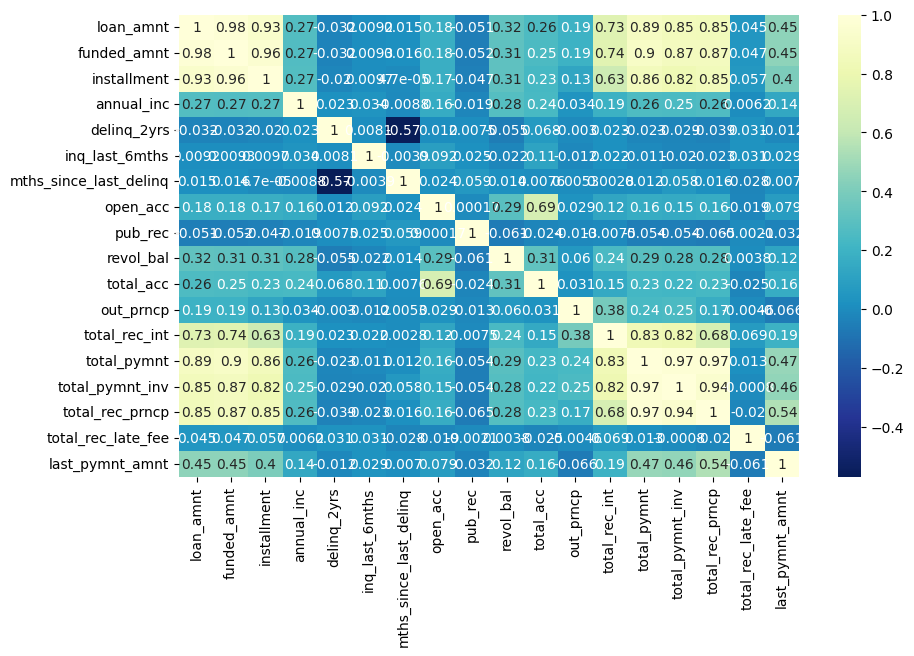

In [47]:
int_columns = ["loan_amnt", "funded_amnt", "installment", "annual_inc", "delinq_2yrs", "inq_last_6mths", "mths_since_last_delinq",
               "open_acc", "pub_rec", "revol_bal",  "total_acc", "out_prncp", "total_rec_int", "total_pymnt", "total_pymnt_inv",
               "total_rec_prncp", "total_rec_late_fee", "last_pymnt_amnt"]
str_columns = ["term", "grade", 'sub_grade', 'emp_title','emp_length', 'home_ownership', 'emp_length', 'home_ownership','title', 'zip_code', 'addr_state',
                'initial_list_status']
float_columns = ["int_rate", "dti", "revol_util"]
date_columns = ["issue_d", "last_pymnt_d", "last_credit_pull_d"]

plt.figure(figsize=(10,6))
sns.heatmap(df[int_columns].corr(),annot=True,cmap="YlGnBu_r")
plt.show()

